In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
'''
STEP 1: LOADING DATASET
'''
# Картинки 28 * 28
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())
class_names = train_dataset.classes # забираем метки классов

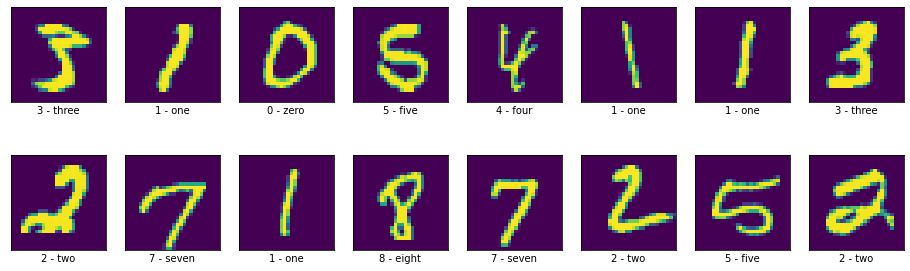

In [4]:
# отрисуем все что у нас есть
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_dataset))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(train_dataset[random_index][0][0])
        ax.set_xlabel(class_names[train_dataset[random_index][1]])
plt.show()

In [23]:
batch_size = 784
num_epochs = 10

In [12]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

#.....#

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# multi-class classification
# 

In [19]:
'''
STEP 3: CREATE MODEL CLASS
'''
# Давайте прикинем какую архитектуру нам было бы неплохо сделать для данных
# и соберем сам класс модельки

class FeedforwardNeuralNetModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size: int = 10):
        
        super(FeedforwardNeuralNetModel, self).__init__()
        
        self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        
        self.batch_norm = nn.BatchNorm1d(num_features=hidden_size)
        
        self.linear2 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
        
        self.dropout = nn.Dropout(p=0.2)
        
        self.linear3 = nn.Linear(in_features=hidden_size, out_features=output_size)
        
        nn.init.kaiming_normal_(self.linear1.weight)
        nn.init.kaiming_normal_(self.linear2.weight)
        nn.init.kaiming_normal_(self.linear3.weight)
    
    def forward(self, x):
        
        out = self.linear1(x)
        out = self.activation(out)
        
        out = self.batch_norm(out)
        
        out = self.linear2(out)
        out = self.activation(out)
        
        out = self.dropout(out)
        
        out = self.linear3(out)
        
        return out


In [20]:
'''
STEP 4: INSTANTIATE BASE PARAMETERS
'''

model = FeedforwardNeuralNetModel(784, 256, 10)

In [21]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''

criterion = nn.CrossEntropyLoss()

In [22]:
'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.005

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
'''
STEP 7: TRAIN THE MODEL
'''

for epoch in range(num_epochs):
    
    model.train()
    for data, labels in train_loader:
        
        data = data.view(-1, 28*28)
        
        optimizer.zero_grad()
        
        result = model(data)
        
        loss = criterion(result, labels)
        
        loss.backward()
        
        optimizer.step()
    
    torch.save(model, 'model.file')
    model.eval()
    correct = 0
    total = 0
    for data, labels in test_loader:
        
        data = data.view(-1, 28*28)
        
        result = model(data)
        
        result_labels = torch.argmax(result, dim=1)
        
        correct += (result_labels == labels).sum().item()
        total += labels.size(0)
        
    print(f'EPOCH = {epoch}, TEST_ACCURACY = {correct / total}')

EPOCH = 0, TEST_ACCURACY = 0.97
EPOCH = 1, TEST_ACCURACY = 0.9767
EPOCH = 2, TEST_ACCURACY = 0.9759
EPOCH = 3, TEST_ACCURACY = 0.9763
EPOCH = 4, TEST_ACCURACY = 0.9749
EPOCH = 5, TEST_ACCURACY = 0.9766
EPOCH = 6, TEST_ACCURACY = 0.9742
EPOCH = 7, TEST_ACCURACY = 0.9748
EPOCH = 8, TEST_ACCURACY = 0.9763
EPOCH = 9, TEST_ACCURACY = 0.9797


In [38]:
model.linear1.weight

Parameter containing:
tensor([[ 0.0005, -0.0348, -0.0899,  ..., -0.0787, -0.0218, -0.0891],
        [-0.0427, -0.0158,  0.0697,  ..., -0.0340,  0.0084, -0.0307],
        [-0.0242, -0.0133, -0.0332,  ...,  0.0164, -0.0158,  0.0603],
        ...,
        [-0.1109,  0.0291, -0.1443,  ..., -0.0316,  0.0323,  0.1054],
        [ 0.0021,  0.0330, -0.0359,  ...,  0.0417, -0.0111, -0.0216],
        [-0.0259,  0.1124,  0.0695,  ..., -0.0058,  0.0833, -0.0611]],
       requires_grad=True)

## Рубрика эксперименты

In [ ]:
# наша базовая моделька

In [ ]:
# А что будет если не нормировать данные?

In [ ]:
# А теперь давайте сделаем 6ти слойного монстра по 100 нейронов в каждом слое и в каждом слое по sigmoid

 ## Игрища с иницализацией 

In [ ]:
# предлагаю дома посмотреть на результаты подобных игрищ

## Sigmoid + Xavier


## Tanh + Xavier


## ReLU + He


## Sigmoid + He


## Tanh + He


[Можно почитать про инициализацию](https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/weight_initialization_activation_functions/)